In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings

In [2]:
df = pd.read_csv("../csv/exported_queries/Distribuzione_temporale_eventi_fix_with_members.csv")
df.head()

,Unnamed: 0,ID,time,country,state,lon,lat,partecipanti,timezone_str,datetime_timezoned
0,0,260269871,5317552800000,us,ca,-118.33,33.87,1,America/Los_Angeles,04/07/2138 10
1,1,260260779,3384554400000,us,wa,-117.43,47.67,2,America/Los_Angeles,01/04/2077 18
2,2,ztbltqyxcdbbc,2150290800000,us,tn,-86.72,36.08,1,America/Chicago,20/02/2038 09
3,3,260361735,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08
4,4,260337211,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08


In [3]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [4]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,ID,time,country,state,lon,lat,partecipanti,timezone_str,datetime_timezoned,day,dtime
0,260269871,5317552800000,us,ca,-118.33,33.87,1,America/Los_Angeles,04/07/2138 10,Friday,10
1,260260779,3384554400000,us,wa,-117.43,47.67,2,America/Los_Angeles,01/04/2077 18,Thursday,18
2,ztbltqyxcdbbc,2150290800000,us,tn,-86.72,36.08,1,America/Chicago,20/02/2038 09,Saturday,09
3,260361735,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08,Wednesday,08
4,260337211,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08,Wednesday,08


In [5]:
df_date = df[['day','dtime', 'partecipanti']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [6]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week

C:\Users\fabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_date.head()

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [8]:
df_day = df[['day','partecipanti']].groupby('day', as_index = False).sum()
df_time = df[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
df_day

,day,partecipanti
0,Friday,126261
1,Monday,101700
2,Saturday,268015
3,Sunday,157555
4,Thursday,210401
5,Tuesday,195264
6,Wednesday,212696


In [9]:
df_time

,dtime,partecipanti
0,00,1525
1,01,308
2,02,178
3,03,274
4,04,154
5,05,616
6,06,3017
7,07,12921
8,08,30557
9,09,61701


Text(0.5,0,'Participants')

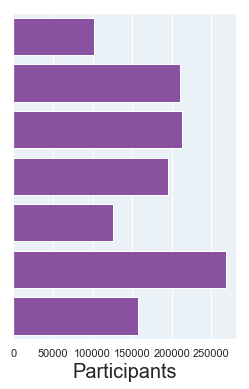

In [10]:
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1 = sns.barplot('partecipanti', 'day', data = df_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1.set_ylabel('')
ax1.set(yticklabels = [])
ax1.set_xlabel("Participants", fontsize = 20)

Text(0,0.5,'Participants')

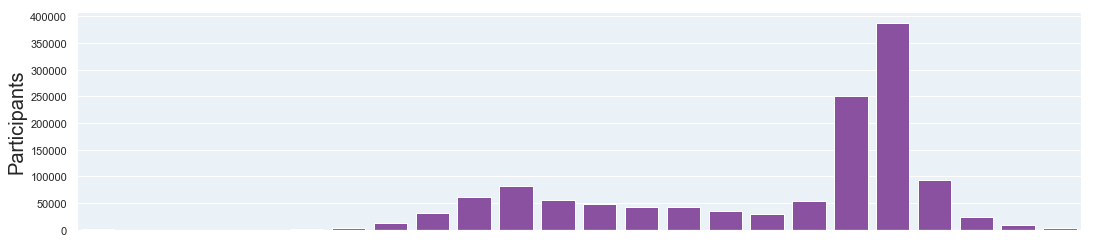

In [11]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax = sns.barplot('dtime', 'partecipanti', data = df_time, color = '#8E44AD')
ax.set_xlabel('')
ax.set(xticklabels = [])
ax.set_ylabel("Participants", fontsize = 20)

In [12]:
#ax1.figure.savefig("C:/Users/fabri/OneDrive/Desktop/barplotdx.png")
#ax.figure.savefig("C:/Users/fabri/OneDrive/Desktop/barplotsup.png")